In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
sns.set(style="darkgrid")

In [2]:
# load datasest
df = pd.read_excel("./data/2nd_Dataset_IgM_Rapid_Test-ELISA_Raw_Data.xlsx", header=0, comment="#")
len(df)

106

In [3]:
# further cleanup
indexNames = df[df['Age'] == 'NS'].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

# set age to numeric
df["Age"] = df["Age"].astype(int)

# bin ages
df["Age bin"] = pd.cut(x=df['Age'], 
                       bins=[10, 20, 29, 39, 49, 59, 69, 79, 89], 
                       labels=['10s', '20s', '30s', '40s', '50s','60s', '70s', '80s'])

# remove unwanted spaces

df[" IgM/Pos."] = df[" IgM/Pos."].str.replace(' ', '')

# remove empty cells
df = df.dropna(axis=0)
len(df)

87

In [4]:
# create class column
def get_class(row):
    wanted = row["lab-ID"]
    return wanted.split("-")[0]

df["status"] = df.apply(get_class, axis=1)

# create target column
def encode_symptoms(row):
    wanted = row["Symptoms"]
    if str(wanted) == "no":
        return 0
    return 1

df["target"] = df.apply(encode_symptoms, axis=1)


# create target column
def encode_symptoms(row):
    wanted = row["Symptoms"]
    if str(wanted) == "no":
        return "no"
    return "yes"

df["symptoms_presence"] = df.apply(encode_symptoms, axis=1)

In [5]:
# Classify status

high_od_elisa = df[df["E-IgM/ODs"] >= 0.5]
high_int_rapid_test = df[df["IgM/b-intin. value"] >= 10]
low_od_elisa  = df[df["E-IgM/ODs"] < 0.5]
low_int_rapid_test = df[df["IgM/b-intin. value"] < 10]

print("status | number_of_participants")
print("--------------------------")
print(f"high_elisa_od | {len(high_od_elisa)}")
print("--------------------------")
print(f"low_elisa_od | {len(low_od_elisa)}")
print("--------------------------")
print(f"high_rapid_test_int | {len(high_int_rapid_test)}")
print("--------------------------")
print(f"low_rapid_test_int | {len(low_int_rapid_test)}")




status | number_of_participants
--------------------------
high_elisa_od | 14
--------------------------
low_elisa_od | 73
--------------------------
high_rapid_test_int | 12
--------------------------
low_rapid_test_int | 75


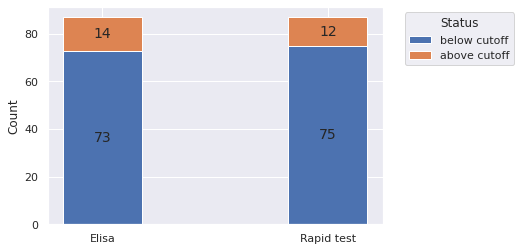

In [52]:
labels = ['Elisa', 'Rapid test']
high = [len(high_od_elisa), len(high_int_rapid_test)]
low = [len(low_od_elisa), len(low_int_rapid_test)]
width = 0.35 


fig, ax = plt.subplots()

ax.bar(labels, low, width,
       label='below cutoff')
ax.bar(labels, high, width, bottom=low, label='above cutoff')
ax.set_ylabel('Count')
ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=14)

plt.show()

In [26]:
def plot_symptoms_status(df_slice):
    count_dict = dict(df_slice["symptoms_presence"].value_counts())
    ax = sns.countplot(x="symptoms_presence", data=df_slice, order=["no", "yes"])
    for index, text in enumerate(ax.get_xticklabels()):
        label = count_dict[text.get_text()]
        ax.text(index,
                label + 0.1,
                str(label),
                horizontalalignment='center',
                size='medium',
                color='black',
                weight='normal')
    return plt.show()
    

High ELISA od


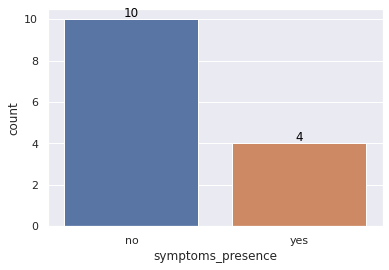

In [7]:
# symptoms status in high elisa od particpants
print("High ELISA od")
plot_symptoms_status(high_od_elisa)


Low ELISA od


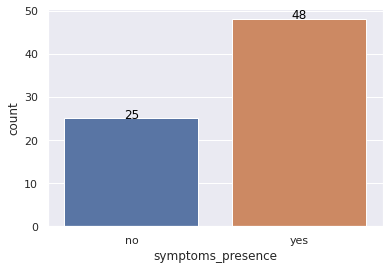

In [8]:
# symptoms status in low elisa od particpants
print("Low ELISA od")
plot_symptoms_status(low_od_elisa)

In [9]:
# t test
# mean of elisa od in low od patients  
# is equal to mean of elisa od in high od patients

from scipy import stats
low_od = low_od_elisa["E-IgM/Ods"]
high_od = high_od_elisa["E-IgM/Ods"]

t_test = stats.ttest_ind(low_od, high_od)
t_test

Ttest_indResult(statistic=-11.553141339189166, pvalue=4.1262323901140923e-19)

In [10]:
# t test
# mean of elisa od in symtomatic patients 
# is equal to mean of elisa od in asymptomatic patients

from scipy import stats
symptoms_absent = df[df["symptoms_presence"] == "no"]["E-IgM/Ods"]
symptoms_present = df[df["symptoms_presence"] == "yes"]["E-IgM/Ods"]

t_test = stats.ttest_ind(symptoms_absent, symptoms_present)
t_test

Ttest_indResult(statistic=1.3525954479071787, pvalue=0.17977219856054807)

In [12]:
# t test
# mean of elisa od in symtomatic patients wit low titre 
# is equal to mean of elisa od in asymptomatic patients with low titre

from scipy import stats
symptoms_absent = low_od_elisa[low_od_elisa["symptoms_presence"] == "no"]["E-IgM/Ods"]
symptoms_present = low_od_elisa[low_od_elisa["symptoms_presence"] == "yes"]["E-IgM/Ods"]

t_test = stats.ttest_ind(symptoms_absent, symptoms_present)
t_test

Ttest_indResult(statistic=-1.4385859735540023, pvalue=0.15466160572828064)

In [13]:
# t test
# mean of elisa od in symtomatic patients wit high titre 
# is equal to mean of elisa od in asymptomatic patients with high titre

from scipy import stats
symptoms_absent = high_od_elisa[high_od_elisa["symptoms_presence"] == "no"]["E-IgM/Ods"]
symptoms_present = high_od_elisa[high_od_elisa["symptoms_presence"] == "yes"]["E-IgM/Ods"]

t_test = stats.ttest_ind(symptoms_absent, symptoms_present)
t_test

Ttest_indResult(statistic=-0.26701951830941456, pvalue=0.7939876421805823)

## Rapid test

High Rapid test intensity


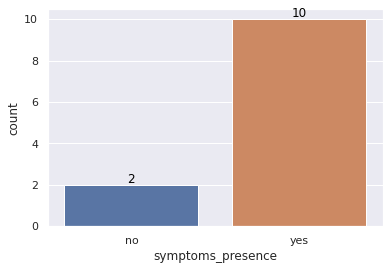

In [15]:
# symptoms status in high rapid test particpants
print("High Rapid test intensity")
plot_symptoms_status(high_int_rapid_test)

Low Rapid test intensity


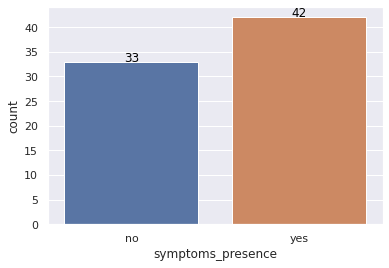

In [16]:
# symptoms status in low rapid test particpants
print("Low Rapid test intensity")
plot_symptoms_status(low_int_rapid_test)